##### $\hspace{15pt}$ **Filename: forwardBackwardPropagation.ipynb**
##### $\hspace{1.5pt}$ **Date Created: November 30, 2023**
##### **Date Modified: December 2, 2023**
##### $\rule{10.5in}{1pt}$
##### **Use a sequence of forward and backward propagation to estimate the intercept and coefficient of a simple linear regression model. Data is first generated from a specified simple linear regression model. The simulated data is then passed to a sequence of alternating forward and backward propagation.**

##### **The content of this notebook is based on the discussion in sections 5.2 - 5.5 of the book [Deep Learning with Pytorch](https://www.manning.com/books/deep-learning-with-pytorch). Some changes were made in the presentation of the content particularly in the specific example that was created for demonstration purposes.**
##### $\rule{10.5in}{1pt}$

##### Load modules and packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

##### Set the float format of pandas dataframes.

In [2]:
pd.options.display.float_format = "{:.2f}".format

##### Set the true values of the parameters of a simple linear regression model. The parameters of interest here consist of the intercept and coefficient.

In [3]:
a0 = -5
a1 = 3

##### Generate data from the model.

In [4]:
np.random.seed(1)
x = 100*np.random.rand(20)
y = a0 + a1*x + np.random.normal(scale = 0.5)
data = pd.DataFrame({"x": x, "y": y})
data

,x,y
0,41.70,120.67
1,72.03,211.66
2,0.01,-4.40
3,30.23,86.27
4,14.68,39.59
5,9.23,23.27
6,18.63,51.44
7,34.56,99.24
8,39.68,114.60
9,53.88,157.21


##### Define the functions needed in the estimation of parameters.

In [5]:
def model(x, a0, a1):
    "Evaluate the model given values of the independent variable and parameters."

    return a0 + a1*x

def loss(yHat, y):
    "Calculate the mean squared error."

    squaredErrors = (yHat - y)**2

    return squaredErrors.mean()

def dloss_dmodel(yHat, y):
    "Calculate the partial derivative of the loss function with respect to the model."

    dsquaredErrors = 2*(yHat - y)/yHat.size(0)

    return dsquaredErrors

def dmodel_da0(x, a0, a1):
    "Calculate the partial derivative of the model with respect to the intercept."

    return 1.0

def dmodel_da1(x, a0, a1):
    "Calculate the partial derivative of the model with respect to the coefficient."

    return x

def gradient(x, y, yHat, a0, a1):
    "Calculate the gradient of the loss function."

    dloss_da0 = dloss_dmodel(yHat, y)*dmodel_da0(x, a0, a1)
    dloss_da1 = dloss_dmodel(yHat, y)*dmodel_da1(x, a0, a1)

    return torch.stack([dloss_da0.sum(), dloss_da1.sum()])

##### Define a function that executes the estimation process using a sequence of forward and backward propagation.

In [6]:
def estimateParams(nEpochs, learningRate, params, x, y, displayEpochs = True):
    "Estimate the parameters using a sequence of forward and backward propagation."

    lossList = []
    interceptList = []
    coefficientList = []
    for epoch in range(1, nEpochs + 1):

        a0, a1 = params

        yHat = model(x, a0, a1)
        L = loss(yHat, y)
        G = gradient(x, y, yHat, a0, a1)

        params = params - learningRate*G

        if displayEpochs:

           if epoch <= 3 or epoch >= nEpochs - 2:

              print('Epoch %d:' % epoch)
              print('        Loss = %f' % L)
              print('    Gradient = ', G)
              print('      Params = ', params)
              print('')

           if epoch == 4:
              print('...\n...\n...\n')

        if not torch.isfinite(L).all():
           break

        lossList.append(float(L))
        interceptList.append(float(params[0]))
        coefficientList.append(float(params[1]))

    return params, lossList, interceptList, coefficientList

##### Run the function.

In [7]:
nEpochs = 50000
learningRate = 0.0001
params = torch.tensor([0.0, 1.0])
xTensor = torch.from_numpy(x)
yTensor = torch.from_numpy(y)
estimatedParams, lossList, interceptList, coefficientList = estimateParams(nEpochs = nEpochs, learningRate = learningRate, params = params,
                                                                           x = xTensor, y = yTensor)

Epoch 1:
        Loss = 7107.861862
    Gradient =  tensor([ -138.0461, -7413.8489], dtype=torch.float64)
      Params =  tensor([0.0138, 1.7414], dtype=torch.float64)

Epoch 2:
        Loss = 2673.698057
    Gradient =  tensor([  -83.5592, -4543.8650], dtype=torch.float64)
      Params =  tensor([0.0222, 2.1958], dtype=torch.float64)

Epoch 3:
        Loss = 1008.095344
    Gradient =  tensor([  -50.1650, -2784.8916], dtype=torch.float64)
      Params =  tensor([0.0272, 2.4743], dtype=torch.float64)

...
...
...

Epoch 49998:
        Loss = 0.014205
    Gradient =  tensor([ 0.1311, -0.0025], dtype=torch.float64)
      Params =  tensor([-4.2165,  2.9959], dtype=torch.float64)

Epoch 49999:
        Loss = 0.014204
    Gradient =  tensor([ 0.1311, -0.0025], dtype=torch.float64)
      Params =  tensor([-4.2166,  2.9959], dtype=torch.float64)

Epoch 50000:
        Loss = 0.014202
    Gradient =  tensor([ 0.1311, -0.0025], dtype=torch.float64)
      Params =  tensor([-4.2166,  2.9959], dtyp

##### Display the estimated parameters.

In [8]:
estimatedParams

tensor([-4.2166,  2.9959], dtype=torch.float64)

##### Display how the values of the loss function change in the first 10 epochs.

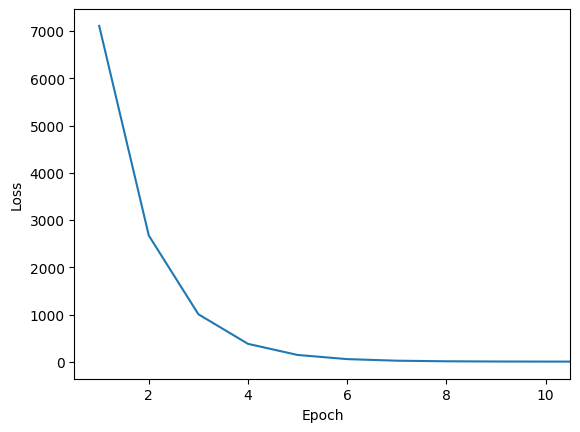

In [9]:
plt.plot(range(1, len(lossList) + 1), lossList)
plt.xlim([0.5, 10.5])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

##### Display how the estimated parameters change throughout the epochs.

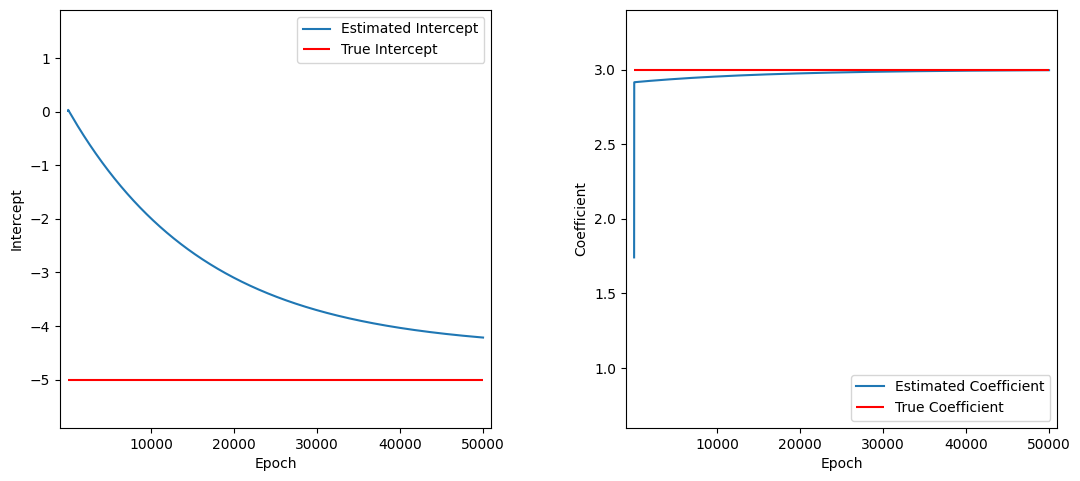

In [10]:
plt.rcParams["figure.figsize"] = [12, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(1, len(interceptList) + 1), interceptList)
ax1.hlines(y = -5, xmin = 0.5, xmax = len(interceptList), color = "r")
ax1.set_xticks(np.arange(10000, len(interceptList) + 1000, step = 10000))
ax1.set_xlim([-1000, len(interceptList) + 1000])
ax1.set_ylim([-5.9, 1.9])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Intercept")
ax1.legend(["Estimated Intercept", "True Intercept"], loc ="upper right")

ax2.plot(range(1, len(coefficientList) + 1), coefficientList)
ax2.hlines(y = 3, xmin = 0.5, xmax = len(coefficientList), color = "r")
ax2.set_xticks(np.arange(10000, len(coefficientList) + 1000, step = 10000))
ax2.set_xlim([-1000, len(coefficientList) + 1000])
ax2.set_ylim([0.6, 3.4])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Coefficient")
ax2.legend(["Estimated Coefficient", "True Coefficient"], loc ="lower right")

fig.tight_layout(pad = 5)
plt.show()

##### The following function is a revision, which is called version 2 here, of the function that executes the estimation process. It uses *autograd*, which is Pytorch's automatic differentiation engine.

In [11]:
def estimateParams_v2(nEpochs, learningRate, params, x, y, displayEpochs = True):
    "Estimate the parameters using a sequence of forward and backward propagation."

    lossList = []
    interceptList = []
    coefficientList = []
    for epoch in range(1, nEpochs + 1):

        if params.grad is not None:
           params.grad.zero_()

        a0, a1 = params

        yHat = model(x, a0, a1)
        L = loss(yHat, y)
        L.backward()
        G = params.grad

        with torch.no_grad():
             params -= learningRate*G

        if displayEpochs:

           if epoch <= 3 or epoch >= nEpochs - 2:

              print('Epoch %d:' % epoch)
              print('        Loss = %f' % L)
              print('    Gradient = ', G)
              print('      Params = ', params)
              print('')

           if epoch == 4:
              print('...\n...\n...\n')

        if not torch.isfinite(L).all():
           break

        lossList.append(float(L))
        interceptList.append(float(params[0]))
        coefficientList.append(float(params[1]))

    return params, lossList, interceptList, coefficientList

##### Run the revised function.

In [12]:
nEpochs = 50000
learningRate = 0.0001
params = torch.tensor([0.0, 1.0], requires_grad = True)
xTensor = torch.from_numpy(x)
yTensor = torch.from_numpy(y)
estimatedParams, lossList, interceptList, coefficientList = estimateParams_v2(nEpochs = nEpochs, learningRate = learningRate, params = params,
                                                                              x = xTensor, y = yTensor)

Epoch 1:
        Loss = 7107.861862
    Gradient =  tensor([ -138.0461, -7413.8491])
      Params =  tensor([0.0138, 1.7414], requires_grad=True)

Epoch 2:
        Loss = 2673.698189
    Gradient =  tensor([  -83.5592, -4543.8652])
      Params =  tensor([0.0222, 2.1958], requires_grad=True)

Epoch 3:
        Loss = 1008.095159
    Gradient =  tensor([  -50.1650, -2784.8914])
      Params =  tensor([0.0272, 2.4743], requires_grad=True)

...
...
...

Epoch 49998:
        Loss = 0.014204
    Gradient =  tensor([ 0.1311, -0.0036])
      Params =  tensor([-4.2166,  2.9959], requires_grad=True)

Epoch 49999:
        Loss = 0.014202
    Gradient =  tensor([ 0.1311, -0.0027])
      Params =  tensor([-4.2166,  2.9959], requires_grad=True)

Epoch 50000:
        Loss = 0.014200
    Gradient =  tensor([ 0.1311, -0.0027])
      Params =  tensor([-4.2166,  2.9959], requires_grad=True)



##### The following function is version 3 of the function that executes the estimation process. It also uses autograd as well as a gradient descent optimizer.

In [13]:
def estimateParams_v3(nEpochs, optimizer, params, x, y, displayEpochs = True):
    "Estimate the parameters using a sequence of forward and backward propagation."

    lossList = []
    interceptList = []
    coefficientList = []
    for epoch in range(1, nEpochs + 1):

        if params.grad is not None:
           params.grad.zero_()

        a0, a1 = params

        yHat = model(x, a0, a1)
        L = loss(yHat, y)
        optimizer.zero_grad()
        L.backward()
        G = params.grad
        optimizer.step()

        if displayEpochs:

           if epoch <= 3 or epoch >= nEpochs - 2:

              print('Epoch %d:' % epoch)
              print('        Loss = %f' % L)
              print('    Gradient = ', G)
              print('      Params = ', params)
              print('')

           if epoch == 4:
              print('...\n...\n...\n')

        if not torch.isfinite(L).all():
           break

        lossList.append(float(L))
        interceptList.append(float(params[0]))
        coefficientList.append(float(params[1]))

    return params, lossList, interceptList, coefficientList

##### Run the revised function using the SGD optimizer.

In [14]:
nEpochs = 50000
params = torch.tensor([0.0, 1.0], requires_grad = True)
optimizer = torch.optim.SGD([params], lr = 0.0001)
xTensor = torch.from_numpy(x)
yTensor = torch.from_numpy(y)
estimatedParams, lossList, interceptList, coefficientList = estimateParams_v3(nEpochs = nEpochs, optimizer = optimizer, params = params,
                                                                              x = xTensor, y = yTensor)

Epoch 1:
        Loss = 7107.861862
    Gradient =  tensor([ -138.0461, -7413.8491])
      Params =  tensor([0.0138, 1.7414], requires_grad=True)

Epoch 2:
        Loss = 2673.698189
    Gradient =  tensor([  -83.5592, -4543.8652])
      Params =  tensor([0.0222, 2.1958], requires_grad=True)

Epoch 3:
        Loss = 1008.095159
    Gradient =  tensor([  -50.1650, -2784.8914])
      Params =  tensor([0.0272, 2.4743], requires_grad=True)

...
...
...

Epoch 49998:
        Loss = 0.014204
    Gradient =  tensor([ 0.1311, -0.0036])
      Params =  tensor([-4.2166,  2.9959], requires_grad=True)

Epoch 49999:
        Loss = 0.014202
    Gradient =  tensor([ 0.1311, -0.0027])
      Params =  tensor([-4.2166,  2.9959], requires_grad=True)

Epoch 50000:
        Loss = 0.014200
    Gradient =  tensor([ 0.1311, -0.0027])
      Params =  tensor([-4.2166,  2.9959], requires_grad=True)



##### Note: The output of this run of the revised function is the same as the output before. This is because the SGD optimizer is a standard optimizer, which is also what lies behind the prior function when the optimization algortihm is not specified.

##### Run the revised function using the Adam optimizer.

In [15]:
nEpochs = 50000
params = torch.tensor([0.0, 1.0], requires_grad = True)
optimizer = torch.optim.Adam([params], lr = 0.01)
xTensor = torch.from_numpy(x)
yTensor = torch.from_numpy(y)
estimatedParams, lossList, interceptList, coefficientList = estimateParams_v3(nEpochs = nEpochs, optimizer = optimizer, params = params,
                                                                              x = xTensor, y = yTensor)

Epoch 1:
        Loss = 7107.861862
    Gradient =  tensor([ -138.0461, -7413.8491])
      Params =  tensor([0.0100, 1.0100], requires_grad=True)

Epoch 2:
        Loss = 7032.543915
    Gradient =  tensor([ -137.2915, -7374.4170])
      Params =  tensor([0.0200, 1.0200], requires_grad=True)

Epoch 3:
        Loss = 6957.638527
    Gradient =  tensor([ -136.5370, -7334.9907])
      Params =  tensor([0.0300, 1.0300], requires_grad=True)

...
...
...

Epoch 49998:
        Loss = 0.000000
    Gradient =  tensor([0.0004, 0.0189])
      Params =  tensor([-4.4331,  3.0000], requires_grad=True)

Epoch 49999:
        Loss = 0.000000
    Gradient =  tensor([-0.0004, -0.0197])
      Params =  tensor([-4.4331,  3.0000], requires_grad=True)

Epoch 50000:
        Loss = 0.000000
    Gradient =  tensor([0.0004, 0.0188])
      Params =  tensor([-4.4331,  3.0000], requires_grad=True)



##### Display how the values of the loss function change in the first 500 epochs.

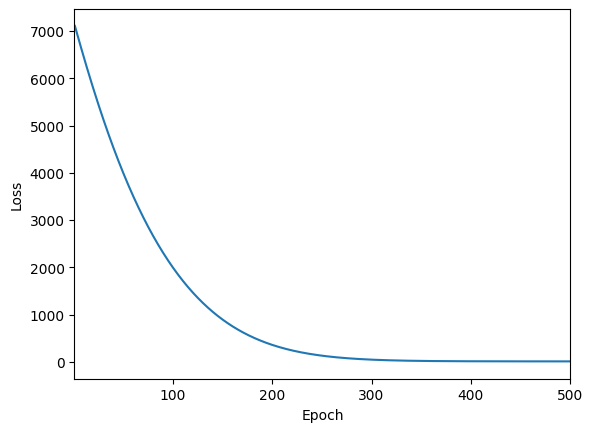

In [16]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(range(1, len(lossList) + 1), lossList)
plt.xlim([0.5, 500.5])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

##### Display how the estimated parameters change throughout the epochs.

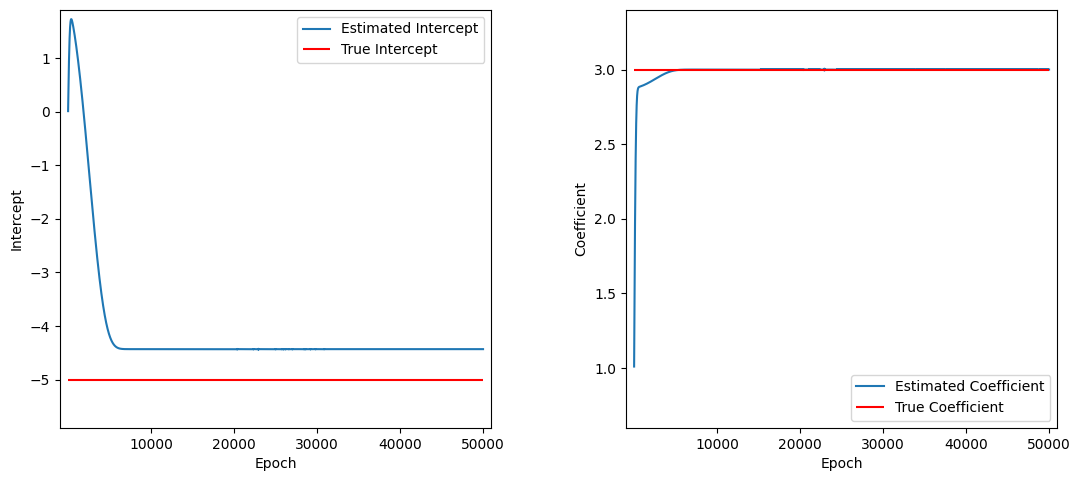

In [17]:
plt.rcParams["figure.figsize"] = [12, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(1, len(interceptList) + 1), interceptList)
ax1.hlines(y = -5, xmin = 0.5, xmax = len(interceptList), color = "r")
ax1.set_xticks(np.arange(10000, len(interceptList) + 1000, step = 10000))
ax1.set_xlim([-1000, len(interceptList) + 1000])
ax1.set_ylim([-5.9, 1.9])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Intercept")
ax1.legend(["Estimated Intercept", "True Intercept"], loc ="upper right")

ax2.plot(range(1, len(coefficientList) + 1), coefficientList)
ax2.hlines(y = 3, xmin = 0.5, xmax = len(coefficientList), color = "r")
ax2.set_xticks(np.arange(10000, len(coefficientList) + 1000, step = 10000))
ax2.set_xlim([-1000, len(coefficientList) + 1000])
ax2.set_ylim([0.6, 3.4])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Coefficient")
ax2.legend(["Estimated Coefficient", "True Coefficient"], loc ="lower right")

fig.tight_layout(pad = 5)
plt.show()

##### The following function is version 4 of the function that executes the estimation process. It uses autograd and a gradient descent optimizer, and also evaluates the loss function in each of the training and test sets.

In [18]:
def estimateParams_v4(nEpochs, optimizer, params, xTrain, yTrain, xTest, yTest, displayEpochs = True):
    "Estimate the parameters using a sequence of forward and backward propagation."

    trainLossList = []
    testLossList = []
    interceptList = []
    coefficientList = []
    for epoch in range(1, nEpochs + 1):

        if params.grad is not None:
           params.grad.zero_()

        a0, a1 = params

        yHatTrain = model(xTrain, a0, a1)
        trainL = loss(yHatTrain, yTrain)

        with torch.no_grad():

             yHatTest = model(xTest, a0, a1)
             testL = loss(yHatTest, yTest)
             assert testL.requires_grad == False

        optimizer.zero_grad()
        trainL.backward()
        G = params.grad
        optimizer.step()

        if displayEpochs:

           if epoch <= 3 or epoch >= nEpochs - 2:

              print('Epoch %d:' % epoch)
              print('    Training Loss = %f' % trainL)
              print('        Test Loss = %f' % testL)
              print('         Gradient = ', G)
              print('           Params = ', params)
              print('')

           if epoch == 4:
              print('...\n...\n...\n')

        if not torch.isfinite(trainL).all():
           break

        trainLossList.append(float(trainL))
        testLossList.append(float(testL))
        interceptList.append(float(params[0]))
        coefficientList.append(float(params[1]))

    return params, trainLossList, testLossList, interceptList, coefficientList

##### Split the data into training and test sets.

In [19]:
xTensor = torch.from_numpy(x)
yTensor = torch.from_numpy(y)

nSamplesData = xTensor.shape[0]
nSamplesTest = int(0.3*nSamplesData)
torch.manual_seed(1)
shuffledIndices = torch.randperm(nSamplesData)
trainIndices = shuffledIndices[:-nSamplesTest]
testIndices = shuffledIndices[-nSamplesTest:]

xTensorTrain = xTensor[trainIndices]
yTensorTrain = yTensor[trainIndices]
xTensorTest = xTensor[testIndices]
yTensorTest = yTensor[testIndices]

##### Run the revised function using the SGD optimizer.

In [20]:
nEpochs = 50000
params = torch.tensor([0.0, 1.0], requires_grad = True)
optimizer = torch.optim.SGD([params], lr = 0.0001)
estimatedParams, trainLossList, testLossList, interceptList, coefficientList = estimateParams_v4(nEpochs = nEpochs, optimizer = optimizer,
                                                                                                 params = params, xTrain = xTensorTrain,
                                                                                                 yTrain = yTensorTrain, xTest = xTensorTest,
                                                                                                 yTest = yTensorTest)

Epoch 1:
    Training Loss = 7333.719007
        Test Loss = 6580.861857
         Gradient =  tensor([ -134.7522, -7632.4048])
           Params =  tensor([0.0135, 1.7632], requires_grad=True)

Epoch 2:
    Training Loss = 2665.180198
        Test Loss = 2365.714684
         Gradient =  tensor([  -79.9175, -4597.2729])
           Params =  tensor([0.0215, 2.2230], requires_grad=True)

Epoch 3:
    Training Loss = 971.409762
        Test Loss = 846.114831
         Gradient =  tensor([  -46.8889, -2769.1125])
           Params =  tensor([0.0262, 2.4999], requires_grad=True)

...
...
...

Epoch 49998:
    Training Loss = 0.006231
        Test Loss = 0.003454
         Gradient =  tensor([ 0.0936, -0.0014])
           Params =  tensor([-4.3000,  2.9976], requires_grad=True)

Epoch 49999:
    Training Loss = 0.006230
        Test Loss = 0.003454
         Gradient =  tensor([ 0.0936, -0.0011])
           Params =  tensor([-4.3000,  2.9976], requires_grad=True)

Epoch 50000:
    Training Loss 

##### Display how the values of the loss function change in the first 10 epochs in each of the training and test sets.

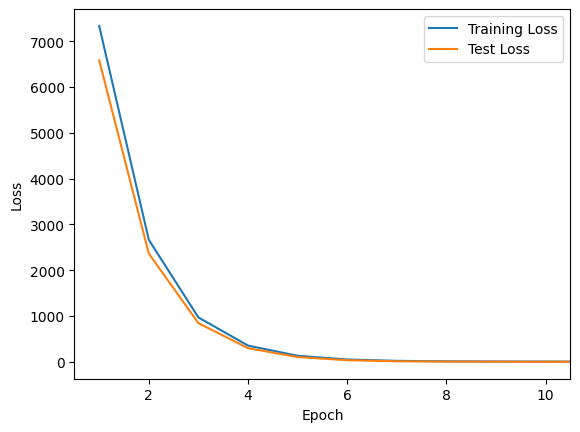

In [21]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]
plt.plot(range(1, len(trainLossList) + 1), trainLossList)
plt.plot(range(1, len(testLossList) + 1), testLossList)
plt.xlim([0.5, 10.5])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Test Loss"], loc ="upper right")
plt.show()

##### The following function is version 5 of the function that executes the estimation process. The model and the loss function are now required to be passed to the function instead of the initial values of the model parameters.

In [22]:
def estimateParams_v5(nEpochs, optimizer, model, loss, xTrain, yTrain, xTest, yTest, displayEpochs = True):
    "Estimate the parameters using a sequence of forward and backward propagation."

    trainLossList = []
    testLossList = []
    interceptList = []
    coefficientList = []
    for epoch in range(1, nEpochs + 1):

        yHatTrain = model(xTrain)
        trainL = loss(yHatTrain, yTrain)
        yHatTest = model(xTest)
        testL = loss(yHatTest, yTest)

        optimizer.zero_grad()
        trainL.backward()
        optimizer.step()
        G = torch.cat((model.bias.grad.squeeze(0), model.weight.grad.squeeze(0)))
        params = list(model.parameters())
        params.reverse()
        params = torch.tensor(params)

        if displayEpochs:

           if epoch <= 3 or epoch >= nEpochs - 2:

              print('Epoch %d:' % epoch)
              print('    Training Loss = %f' % trainL)
              print('        Test Loss = %f' % testL)
              print('         Gradient = ', G)
              print('           Params = ', params)
              print('')

           if epoch == 4:
              print('...\n...\n...\n')

        if not torch.isfinite(trainL).all():
           break

        trainLossList.append(float(trainL))
        testLossList.append(float(testL))
        interceptList.append(float(list(model.parameters())[0]))
        coefficientList.append(float(list(model.parameters())[1]))

    return params, trainLossList, testLossList, interceptList, coefficientList

##### Run the revised function using *torch.nn.Linear(1, 1, dtype = torch.float64)* and *torch.nn.MSELoss()* for the model and loss function, respectively, in addition to the SGD optimizer.

In [23]:
nEpochs = 50000
model = torch.nn.Linear(1, 1)
model.bias.data = torch.tensor([[0.0]])
model.weight.data = torch.tensor([[1.0]])
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)
loss = torch.nn.MSELoss()
xTensorTrain = xTensor[trainIndices].unsqueeze(1).to(torch.float32)
yTensorTrain = yTensor[trainIndices].unsqueeze(1).to(torch.float32)
xTensorTest = xTensor[testIndices].unsqueeze(1).to(torch.float32)
yTensorTest = yTensor[testIndices].unsqueeze(1).to(torch.float32)
estimatedParams, trainLossList, testLossList, interceptList, coefficientList = estimateParams_v5(nEpochs = nEpochs, optimizer = optimizer,
                                                                                                 model = model, loss = loss, xTrain = xTensorTrain,
                                                                                                 yTrain = yTensorTrain, xTest = xTensorTest,
                                                                                                 yTest = yTensorTest)

Epoch 1:
    Training Loss = 7333.718750
        Test Loss = 6580.861328
         Gradient =  tensor([ -134.7522, -7632.4053])
           Params =  tensor([0.0135, 1.7632])

Epoch 2:
    Training Loss = 2665.179932
        Test Loss = 2365.714600
         Gradient =  tensor([  -79.9176, -4597.2729])
           Params =  tensor([0.0215, 2.2230])

Epoch 3:
    Training Loss = 971.409485
        Test Loss = 846.114746
         Gradient =  tensor([  -46.8889, -2769.1125])
           Params =  tensor([0.0262, 2.4999])

...
...
...

Epoch 49998:
    Training Loss = 0.006231
        Test Loss = 0.003454
         Gradient =  tensor([ 0.0936, -0.0010])
           Params =  tensor([-4.3000,  2.9976])

Epoch 49999:
    Training Loss = 0.006230
        Test Loss = 0.003453
         Gradient =  tensor([ 0.0936, -0.0017])
           Params =  tensor([-4.3000,  2.9976])

Epoch 50000:
    Training Loss = 0.006230
        Test Loss = 0.003453
         Gradient =  tensor([ 0.0936, -0.0016])
           P